# Assignment 3 
Isaac Gillette

In [ ]:
import streamlit as st
from langchain.llms import OpenAI
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA

def generate_response(uploaded_file, openai_api_key, query_text):
    # Load document if file is uploaded
    if uploaded_file is not None:
        documents = [uploaded_file.read().decode()]
        # Split documents into chunks
        text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
        texts = text_splitter.create_documents(documents)
        # Select embeddings
        embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)
        # Create a vectorstore from documents
        db = Chroma.from_documents(texts, embeddings)
        # Create retriever interface
        retriever = db.as_retriever()
        # Create QA chain
        qa = RetrievalQA.from_chain_type(llm=OpenAI(openai_api_key=openai_api_key),chain_type='stuff', retriever=retriever)
    return qa.run(query_text)


# Page title
st.set_page_config(page_title='🦜🦜 Ask the Doc App')
st.title('🦜🦜 Ask the Doc App')

# File upload
uploaded_file = st.file_uploader('Upload an article', type='txt')

# Query text
query_text = st.text_input('Enter your question:', placeholder = 'Please provide a short summary.', disabled=not uploaded_file)

# Form input and query
result = []
with st.form('myform', clear_on_submit=True):
    openai_api_key = st.text_input('OpenAI API Key', type='password', disabled=not
(uploaded_file and query_text))
    submitted = st.form_submit_button('Submit', disabled=not(uploaded_file and query_text))
    if submitted and openai_api_key.startswith('sk-'):
        with st.spinner('Calculating...'):
            response = generate_response(uploaded_file, openai_api_key, query_text)
            result.append(response)
            del openai_api_key
if len(result):
    st.info(response)

# Result

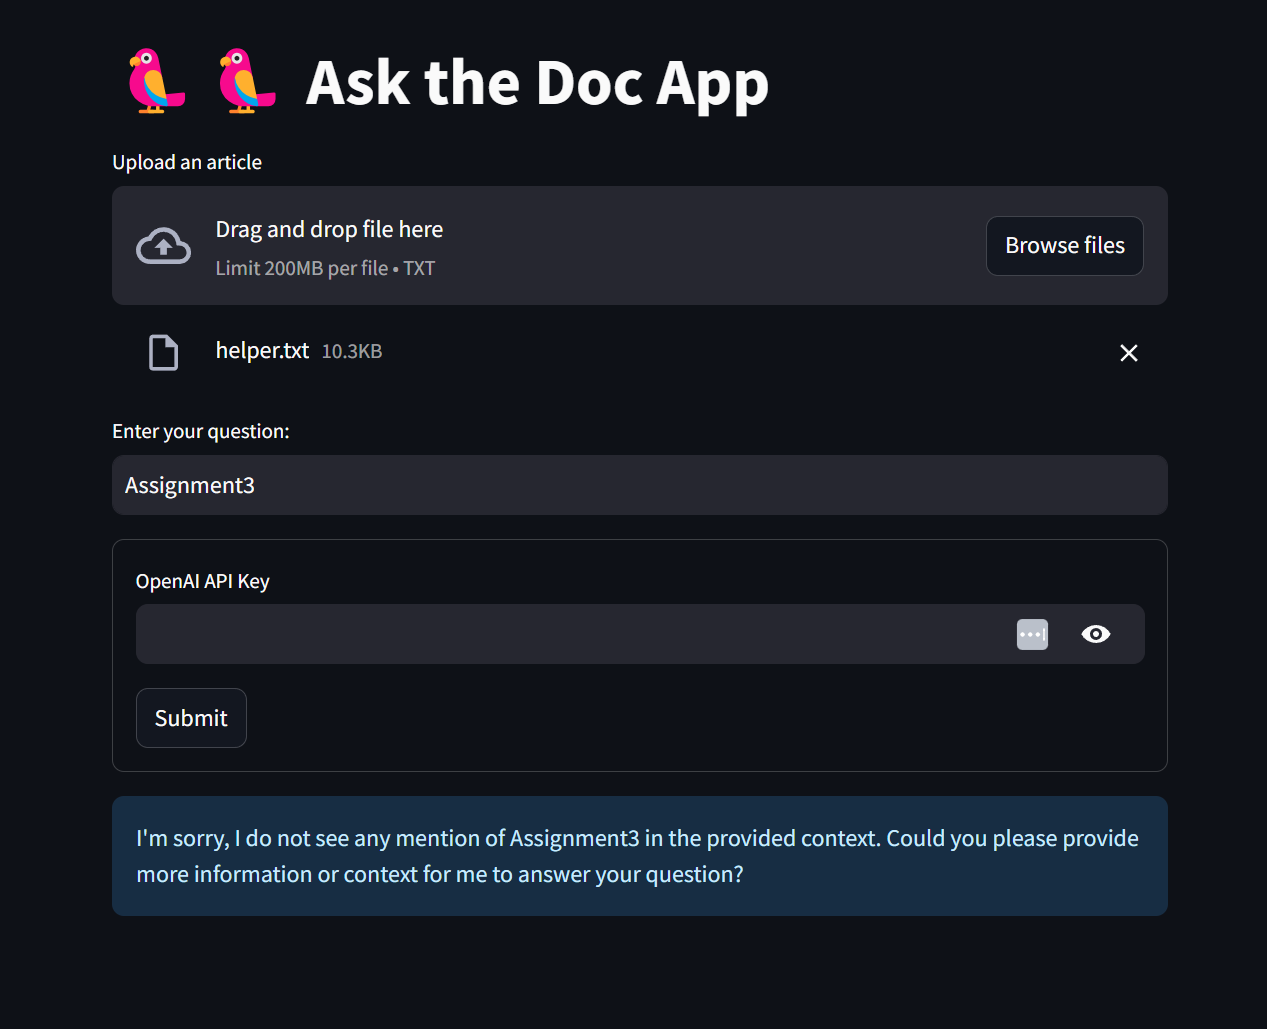